In [9]:
import requests
import json
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd 

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2014-01-02  30.996408  31.196602  30.946359  31.154893  30632200
2014-01-03  30.787882  31.046465  30.529299  31.029781  31134800
2014-01-06  30.137251  30.771191  30.120568  30.737825  43603700
2014-01-07  30.370817  30.437549  30.203990  30.304088  35802800
2014-01-08  29.828623  30.145595  29.678482  30.028816  59971700


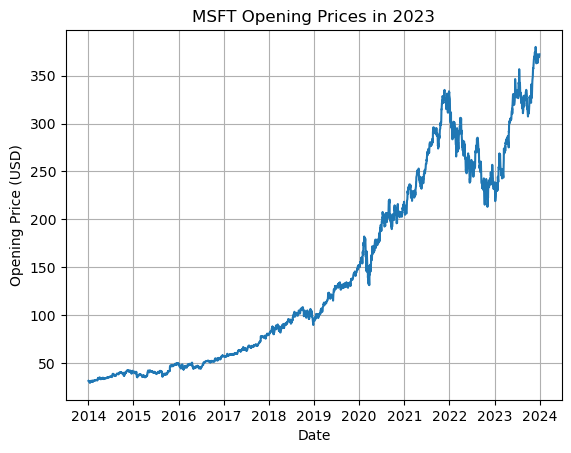

In [25]:
# Download historical data for Microsoft
data = yf.download("MSFT", start="2014-01-01", end="2024-01-01")

# Check the first few rows
print(data.head())

# Plot the opening price
plt.plot(data.index, data['Open'])
plt.title("MSFT Opening Prices in 2023")
plt.xlabel("Date")
plt.ylabel("Opening Price (USD)")
plt.grid(True)
plt.show()

In [11]:
import numpy as np
import math 
import tensorflow as tf
import keras

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# How to train lstm 
## Compile data 
- insert data into np array
    - reshape np array (turn 1D array into 2D array)
- split the data into sequence
```
[10, 20, 30, 40, 50, 60, 70, 80, 90]
X,		        y
10, 20, 30		40
20, 30, 40		50
30, 40, 50		60
```
- normalise data
- split data into test set and training set
- reshape input to be [samples, time steps, features]


In [27]:
# Insert data into np array 
openArr = data['Open'].values 

# reshape data into 2D array 
openArr = np.reshape(openArr, (-1, 1))

# Split data into test set and training set 
trainSize = int(len(openArr) * 0.5)
testSize = len(openArr) - trainSize 
trainSet, testSet

In [19]:
# split data function 
def splitSequence(sequence, steps):
    x, y = [],[]
    for i in range(len(sequence) - steps - 1): 
        end = i + steps
        x.append(sequence[i:end])
        y.append(sequence[end])
    return np.array(x), np.array(y)
    

In [ ]:
# 

## 